# Clustering Example Usage

In [1]:
import matplotlib.pyplot as plt
import numpy as np

## Blobs Examples

In [2]:
from sklearn.datasets import make_blobs

# Generate synthetic data for testing
true_k = 8
X, y = make_blobs(n_samples=1000, n_features=2, centers=true_k, cluster_std=0.60, random_state=1)

### KMeans

In [3]:
from clustering import KMeans

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


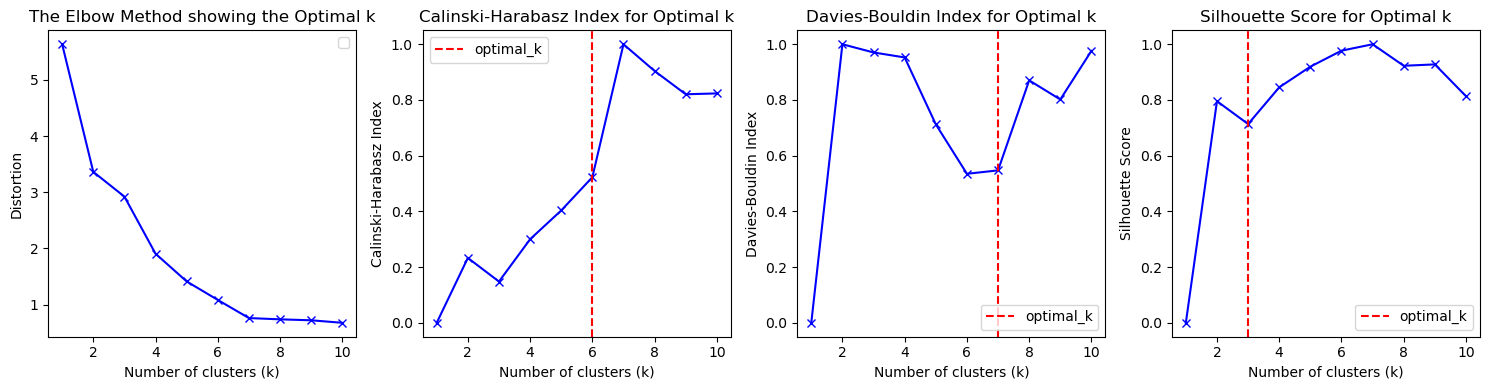

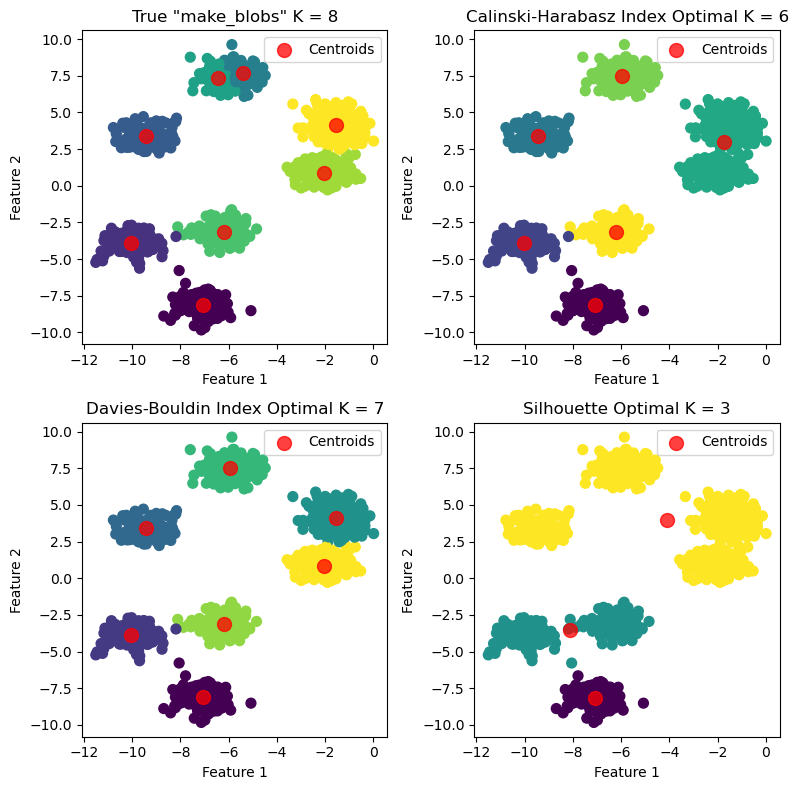

In [4]:
# Initialize KMeans object
kmeans = KMeans(X)

# Find the optimal number of clusters using the elbow method
ch_optimal_k, db_optimal_k, silhouette_optimal_k = kmeans.find_optimal_clusters(max_k=10)

# Create a 2x2 subplot for each k value
fig, axs = plt.subplots(2, 2, figsize=(8, 8))

# Define titles based on which k value method was used
titles = [f'True "make_blobs" K = {true_k}', 
          f'Calinski-Harabasz Index Optimal K = {ch_optimal_k}', 
          f'Davies-Bouldin Index Optimal K = {db_optimal_k}', 
          f'Silhouette Optimal K = {silhouette_optimal_k}']

# Loop through each k value and plot the results of fit()
for i, k in enumerate([true_k, ch_optimal_k, db_optimal_k, silhouette_optimal_k]):
    # Fit the KMeans model with the current k value
    kmeans.n_clusters = k
    kmeans.fit()

    # Predict cluster labels
    labels = kmeans.predict(X)

    # Plot the results in the corresponding subplot
    row = i // 2
    col = i % 2
    scatter = axs[row, col].scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
    centroids = kmeans.centroids
    centroid_scatter = axs[row, col].scatter(centroids[:, 0], centroids[:, 1], c='red', s=100, alpha=0.75, label='Centroids')
    axs[row, col].set_title(titles[i])
    axs[row, col].set_xlabel('Feature 1')
    axs[row, col].set_ylabel('Feature 2')
    axs[row, col].legend()

plt.tight_layout()
plt.show()


### DBSCAN (Density-Based Spatial Clustering Of Applications With Noise)

In [5]:
from clustering import DBSCAN

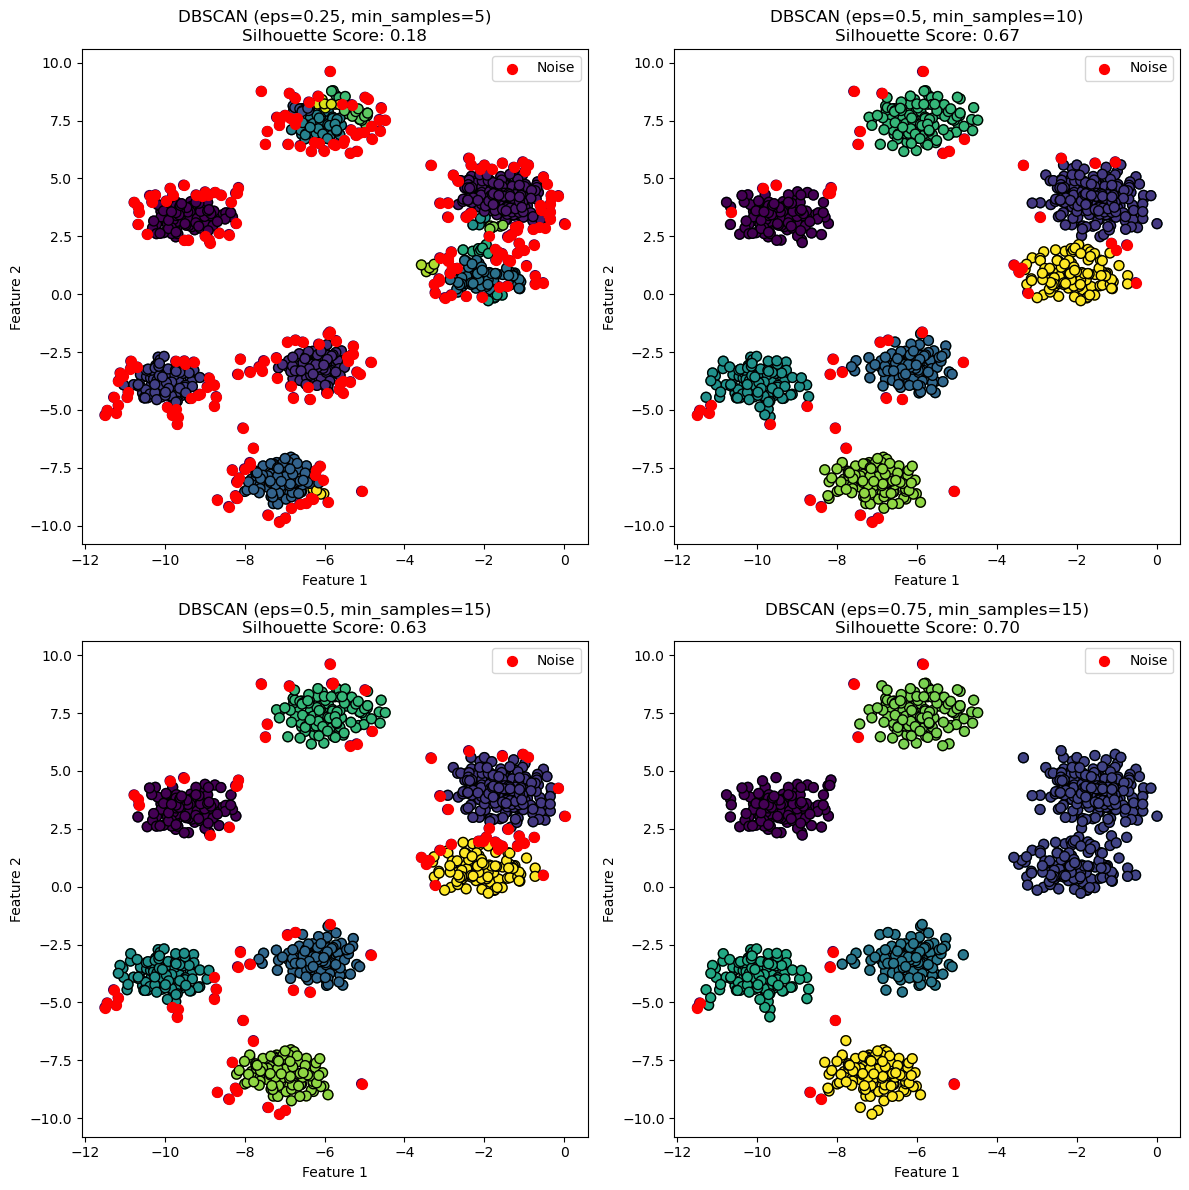

In [6]:
# Define parameters for DBSCAN
params = [
    {'eps': 0.25, 'min_samples': 5},
    {'eps': 0.5, 'min_samples':  10},
    {'eps': 0.5, 'min_samples':  15},
    {'eps': 0.75, 'min_samples': 15},
]

fig, axs = plt.subplots(2, 2, figsize=(12, 12))

for i, param in enumerate(params):
    eps = param['eps']
    min_samples = param['min_samples']
    dbscan = DBSCAN(X, eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict()
    silhouette_score = dbscan.silhouette_score()

    # Plot the DBSCAN results
    ax = axs[i // 2, i % 2]
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
    ax.set_title(f'DBSCAN (eps={eps}, min_samples={min_samples})\nSilhouette Score: {silhouette_score:.2f}')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')

    # Plotting core points and noise points
    core_samples_mask = np.zeros_like(labels, dtype=bool)
    core_samples_mask[dbscan.labels != -1] = True

    # Plot core points
    core_points = X[core_samples_mask]
    ax.scatter(core_points[:, 0], core_points[:, 1], c=labels[core_samples_mask], s=50, cmap='viridis', edgecolors='k')

    # Plot noise points
    noise_points = X[~core_samples_mask]
    ax.scatter(noise_points[:, 0], noise_points[:, 1], c='red', s=50, label='Noise')

    ax.legend()

plt.tight_layout()
plt.show()

## Moons Examples

In [7]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.05, random_state=1)
true_k = 2

### KMeans

In [8]:
from clustering import KMeans

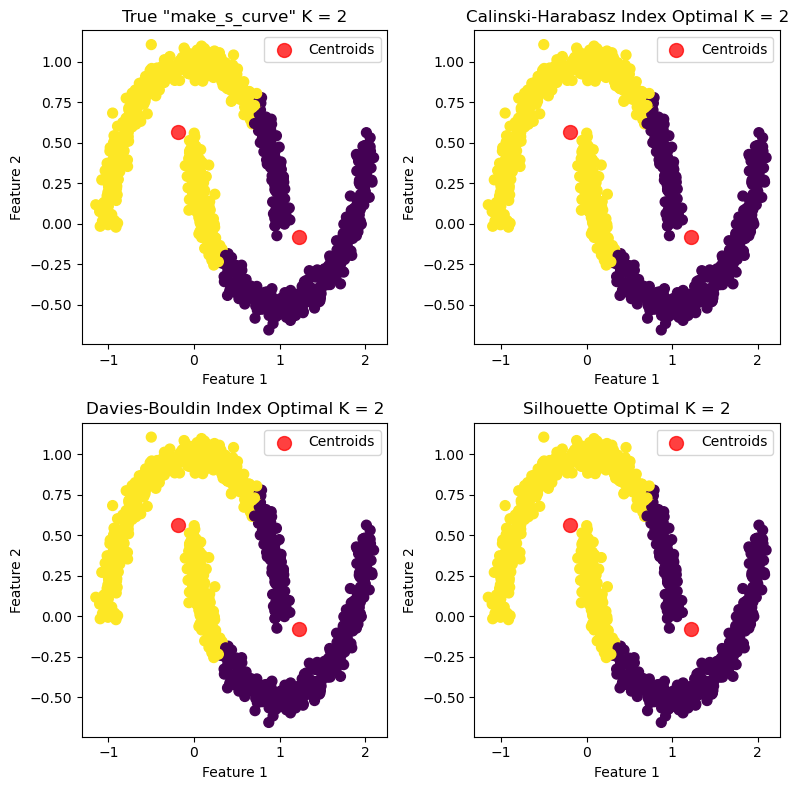

In [9]:
# Initialize KMeans object
kmeans =  KMeans(X)
%matplotlib inline 

# Find the optimal number of clusters using the elbow method
ch_optimal_k, db_optimal_k, silhouette_optimal_k = 2, 2, 2

# Create a 2x2 subplot for each k value
fig, axs = plt.subplots(2, 2, figsize=(8, 8))

# Define titles based on which k value method was used
titles = [ f'True "make_s_curve" K = 2',
           f'Calinski-Harabasz Index Optimal K = {ch_optimal_k}', 
           f'Davies-Bouldin Index Optimal K = {db_optimal_k}', 
           f'Silhouette Optimal K = {silhouette_optimal_k}']

# Loop through each k value and plot the results of fit()
for i, k in enumerate([true_k, ch_optimal_k, db_optimal_k, silhouette_optimal_k]):
    # Fit the KMeans model with the current k value
    kmeans.n_clusters = k
    kmeans.fit()

    # Predict cluster labels
    labels = kmeans.predict(X)

    # Plot the results in the corresponding subplot
    row = i // 2
    col = i % 2
    scatter = axs[row, col].scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
    centroids = kmeans.centroids
    centroid_scatter = axs[row, col].scatter(centroids[:, 0], centroids[:, 1], c='red', s=100, alpha=0.75, label='Centroids')
    axs[row, col].set_title(titles[i])
    axs[row, col].set_xlabel('Feature 1')
    axs[row, col].set_ylabel('Feature 2')
    axs[row, col].legend()

plt.tight_layout()
plt.show()

### DBSCAN

In [10]:
from clustering import DBSCAN

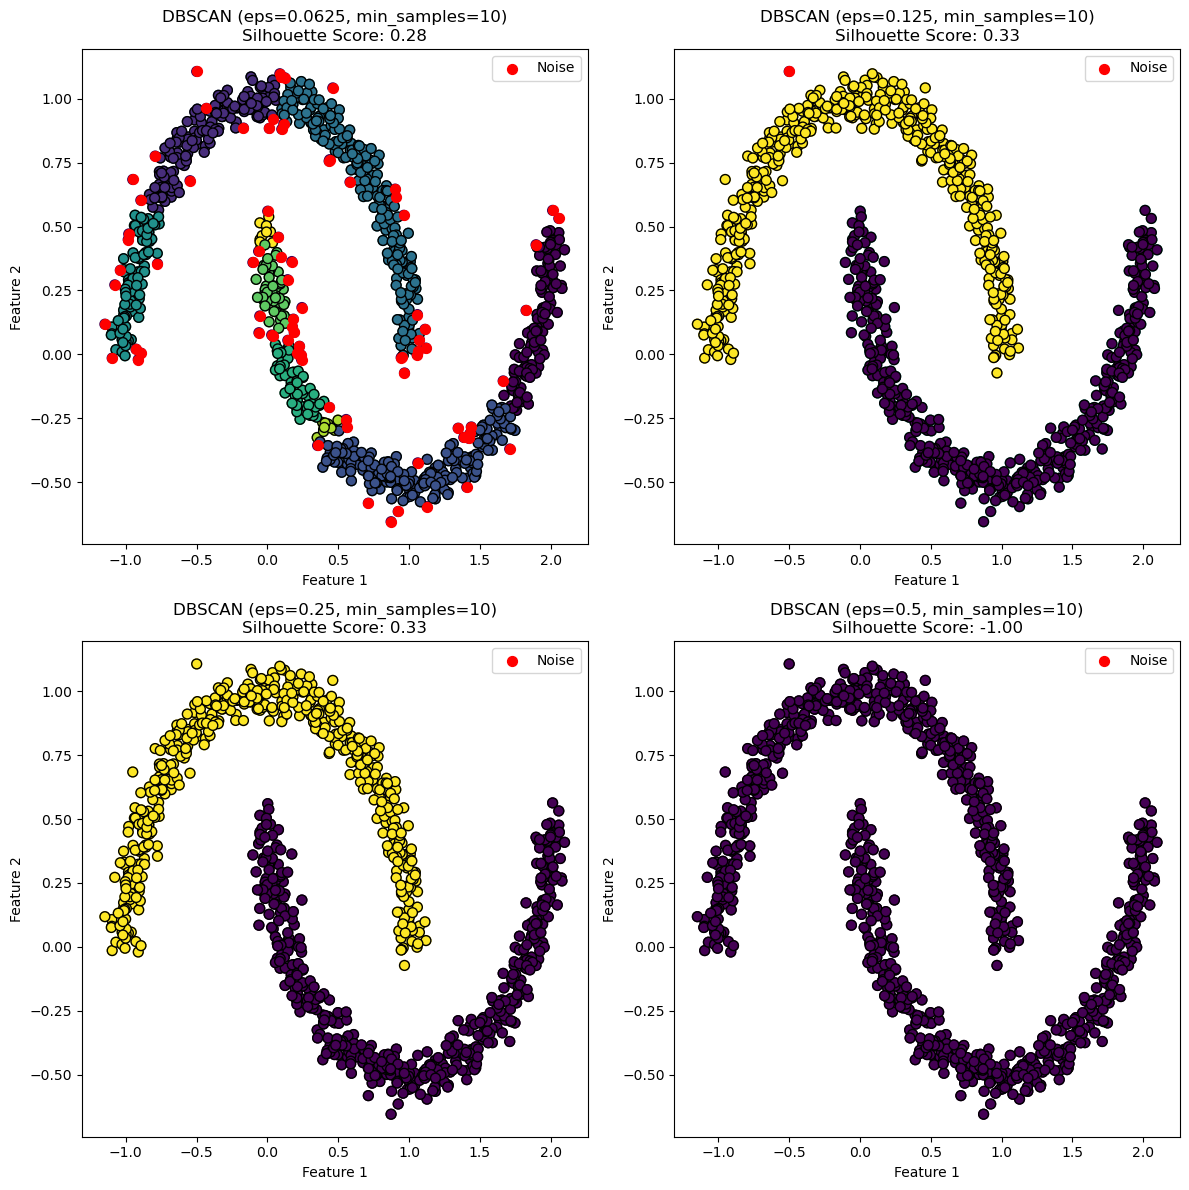

In [11]:
# Define parameters for DBSCAN
params = [
    {'eps': 0.0625, 'min_samples': 10},
    {'eps': 0.125, 'min_samples': 10},
    {'eps': 0.25, 'min_samples': 10},
    {'eps': 0.5, 'min_samples':  10},
]

fig, axs = plt.subplots(2, 2, figsize=(12, 12))

for i, param in enumerate(params):
    eps = param['eps']
    min_samples = param['min_samples']
    dbscan = DBSCAN(X, eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict()
    silhouette_score = dbscan.silhouette_score()

    # Plot the DBSCAN results
    ax = axs[i // 2, i % 2]
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
    ax.set_title(f'DBSCAN (eps={eps}, min_samples={min_samples})\nSilhouette Score: {silhouette_score:.2f}')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')

    # Plotting core points and noise points
    core_samples_mask = np.zeros_like(labels, dtype=bool)
    core_samples_mask[dbscan.labels != -1] = True

    # Plot core points
    core_points = X[core_samples_mask]
    ax.scatter(core_points[:, 0], core_points[:, 1], c=labels[core_samples_mask], s=50, cmap='viridis', edgecolors='k')

    # Plot noise points
    noise_points = X[~core_samples_mask]
    ax.scatter(noise_points[:, 0], noise_points[:, 1], c='red', s=50, label='Noise')

    ax.legend()

plt.tight_layout()
plt.show()

### DBSCAN 3D

In [12]:
# Project to 3D space
true_k = 2
X, y = make_moons(n_samples=1000, noise=0.05, random_state=1)

# Add a third dimension, which is a function of the first two, X3 = X1^2 + X2^2
X = np.column_stack((X, X[:, 0] ** 2 + X[:, 1] ** 2)) 

# %matplotlib qt
# # Plot 3D data
# fig = plt.figure(figsize=(8, 8))
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(X[:, 0], X[:, 1], X[:, 2], s=50)
# ax.set_xlabel('Feature 1')
# ax.set_ylabel('Feature 2')
# ax.set_zlabel('Feature 3')
# plt.show()


In [13]:
%matplotlib qt
from mpl_toolkits.mplot3d import Axes3D

# Define parameters for DBSCAN
params = [
    {'eps': 0.0625, 'min_samples': 10},
    {'eps': 0.125, 'min_samples': 10},
    {'eps': 0.25, 'min_samples': 10},
    {'eps': 0.5, 'min_samples': 10},
]

fig = plt.figure(figsize=(12, 12))

for i, param in enumerate(params):
    eps = param['eps']
    min_samples = param['min_samples']
    dbscan = DBSCAN(X, eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict()
    silhouette_score = dbscan.silhouette_score()

    # Plot the DBSCAN results in 3D
    ax = fig.add_subplot(2, 2, i + 1, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels, s=50, cmap='viridis')
    ax.set_title(f'DBSCAN (eps={eps}, min_samples={min_samples})\nSilhouette Score: {silhouette_score:.2f}')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')

    # Plotting core points and noise points
    core_samples_mask = np.zeros_like(labels, dtype=bool)
    core_samples_mask[dbscan.labels != -1] = True

    # Plot core points
    core_points = X[core_samples_mask]
    ax.scatter(core_points[:, 0], core_points[:, 1], core_points[:, 2], c=labels[core_samples_mask], s=50, cmap='viridis', edgecolors='k')

    # Plot noise points
    noise_points = X[~core_samples_mask]
    ax.scatter(noise_points[:, 0], noise_points[:, 1], noise_points[:, 2], c='red', s=50, label='Noise')

    ax.legend()

plt.tight_layout()
plt.show()

## Circles Examples

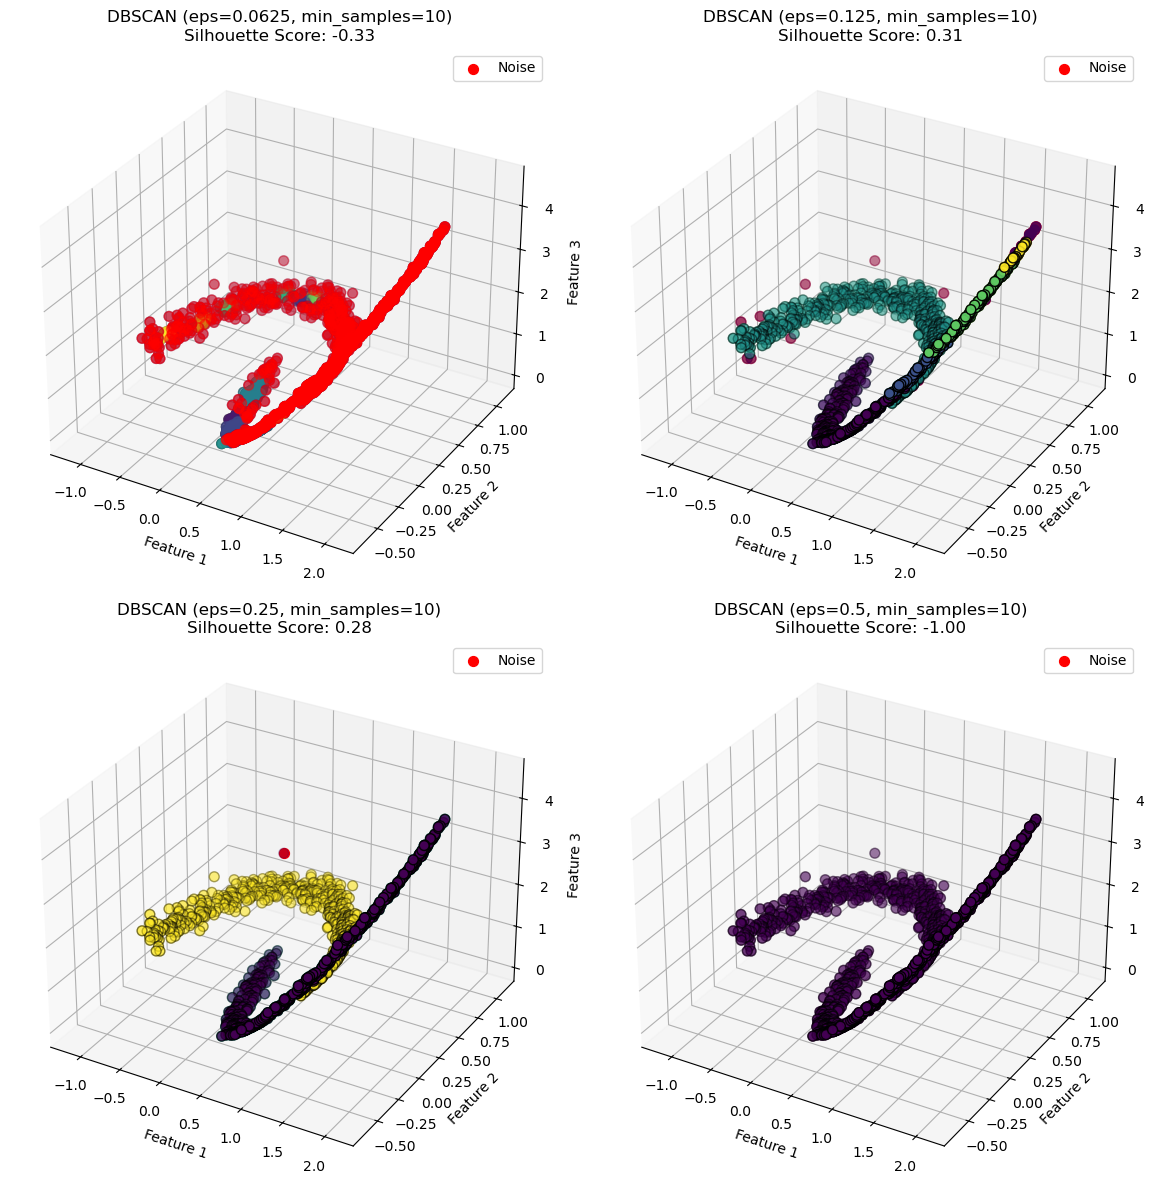

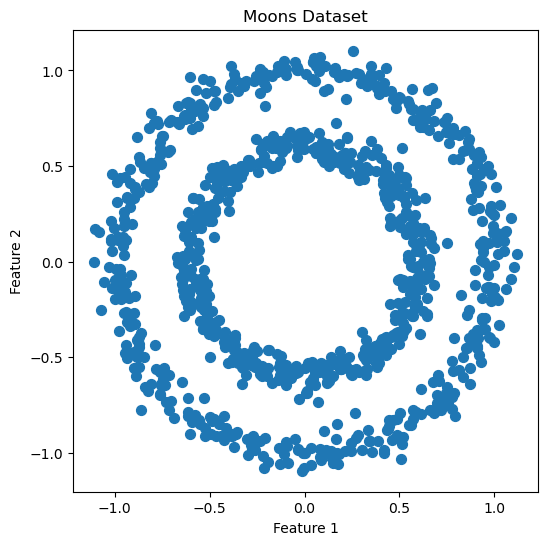

In [14]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, noise=0.05, random_state=1, factor=.6)
true_k = 2

# Plot the data
%matplotlib inline 
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Moons Dataset')
plt.show()


### KMeans

In [15]:
from clustering import KMeans

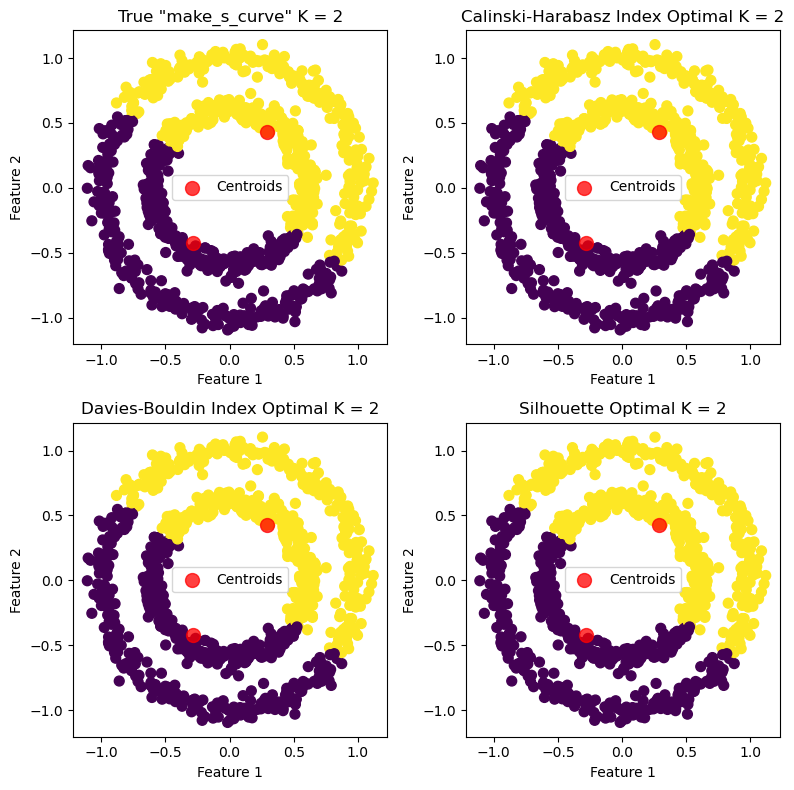

In [16]:
# Initialize KMeans object
kmeans =  KMeans(X)
%matplotlib inline 

# Find the optimal number of clusters using the elbow method
ch_optimal_k, db_optimal_k, silhouette_optimal_k = 2, 2, 2

# Create a 2x2 subplot for each k value
fig, axs = plt.subplots(2, 2, figsize=(8, 8))

# Define titles based on which k value method was used
titles = [ f'True "make_s_curve" K = 2',
           f'Calinski-Harabasz Index Optimal K = {ch_optimal_k}', 
           f'Davies-Bouldin Index Optimal K = {db_optimal_k}', 
           f'Silhouette Optimal K = {silhouette_optimal_k}']

# Loop through each k value and plot the results of fit()
for i, k in enumerate([true_k, ch_optimal_k, db_optimal_k, silhouette_optimal_k]):
    # Fit the KMeans model with the current k value
    kmeans.n_clusters = k
    kmeans.fit()

    # Predict cluster labels
    labels = kmeans.predict(X)

    # Plot the results in the corresponding subplot
    row = i // 2
    col = i % 2
    scatter = axs[row, col].scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
    centroids = kmeans.centroids
    centroid_scatter = axs[row, col].scatter(centroids[:, 0], centroids[:, 1], c='red', s=100, alpha=0.75, label='Centroids')
    axs[row, col].set_title(titles[i])
    axs[row, col].set_xlabel('Feature 1')
    axs[row, col].set_ylabel('Feature 2')
    axs[row, col].legend()

plt.tight_layout()
plt.show()

### DBSCAN

In [17]:
from clustering import DBSCAN

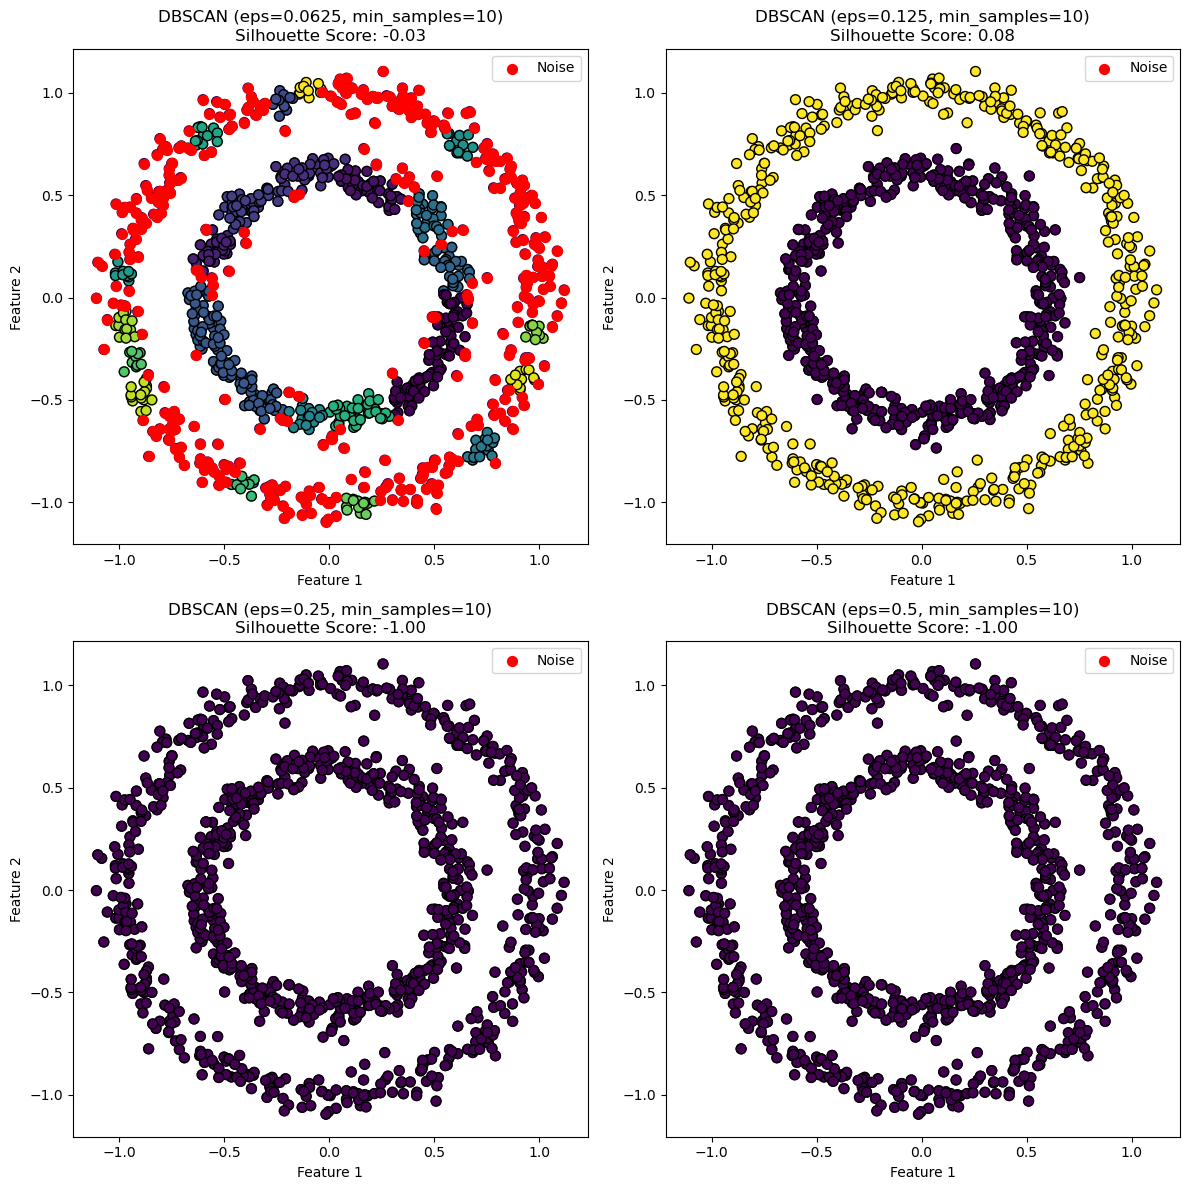

In [18]:
# Define parameters for DBSCAN
params = [
    {'eps': 0.0625, 'min_samples': 10},
    {'eps': 0.125, 'min_samples': 10},
    {'eps': 0.25, 'min_samples': 10},
    {'eps': 0.5, 'min_samples':  10},
]

fig, axs = plt.subplots(2, 2, figsize=(12, 12))

for i, param in enumerate(params):
    eps = param['eps']
    min_samples = param['min_samples']
    dbscan = DBSCAN(X, eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict()
    silhouette_score = dbscan.silhouette_score()

    # Plot the DBSCAN results
    ax = axs[i // 2, i % 2]
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
    ax.set_title(f'DBSCAN (eps={eps}, min_samples={min_samples})\nSilhouette Score: {silhouette_score:.2f}')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')

    # Plotting core points and noise points
    core_samples_mask = np.zeros_like(labels, dtype=bool)
    core_samples_mask[dbscan.labels != -1] = True

    # Plot core points
    core_points = X[core_samples_mask]
    ax.scatter(core_points[:, 0], core_points[:, 1], c=labels[core_samples_mask], s=50, cmap='viridis', edgecolors='k')

    # Plot noise points
    noise_points = X[~core_samples_mask]
    ax.scatter(noise_points[:, 0], noise_points[:, 1], c='red', s=50, label='Noise')

    ax.legend()

plt.tight_layout()
plt.show()